#### Thanks to:
- Amira Adel Foda (intake 42 - smart village branch - group 2)
- Asmaa Said (intake 42 - smart village branch - group 2)
- Marawan Mohamed (intake 42 - Alex. branch - group 2)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Installing MediaPipe

In [ ]:
%%capture
!pip install mediapipe

### Required Libraries

In [ ]:
import numpy as np
import os,cv2,math,glob,random
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import pandas as pd
import mediapipe
import warnings
warnings.filterwarnings('ignore')
from google.colab.patches import cv2_imshow

### Dowlining Data

In [ ]:
# link of the data
# http://www.cbsr.ia.ac.cn/users/xiangyuzhu/projects/3DDFA/Database/AFLW2000-3D.zip

In [ ]:
# Loading AFLW2000 Data
%%capture
if os.path.isfile('/content/AFLW2000-3D.zip') == False:
  !gdown --id  1fP3zvSCYjll_o_m7S12nvQLZ9MnsEoap
  !unzip /content/AFLW2000-3D.zip

### Preparing Data

In [ ]:
data_for_all_images=[]
name_for_all_images=[]

In [ ]:
mylist = [Path(f).stem for f in glob.glob("/content/AFLW2000/*.mat")]


In [ ]:
mylist

In [ ]:
data_for_all_images=[]
name_for_all_images=[]
faceModule = mediapipe.solutions.face_mesh

for img in mylist:
  with faceModule.FaceMesh(static_image_mode=True) as faces:
    # loading the image
    path='/content/AFLW2000/'+img+'.jpg'
    image = cv2.imread(path)
    data_of_current_img=[]
    # processing the face to extract the landmark points (468 point) for each x,y,z
    results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks != None: 
      # looping over the faces in the image
      for face in results.multi_face_landmarks:
          for landmark in face.landmark:
              x = landmark.x
              y = landmark.y
              # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
              shape = image.shape 
              relative_x = int(x * shape[1])
              relative_y = int(y * shape[0])
              data_of_current_img.append(relative_x)
              data_of_current_img.append(relative_y)
     
              # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
              # cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)

          name_for_all_images.append(img+'.jpg')
          data_for_all_images.append(data_of_current_img)
      # cv2_imshow(image)
  # break

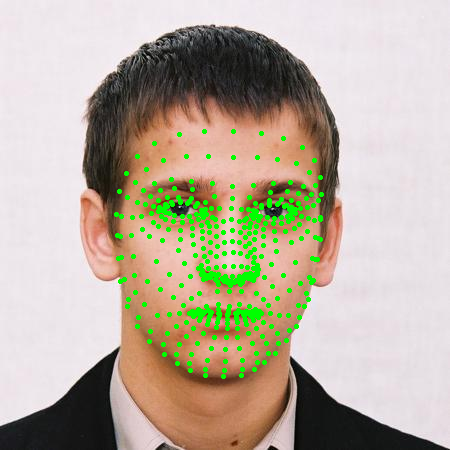

In [ ]:
# choosing random image
random_file = 'image00053'


faceModule = mediapipe.solutions.face_mesh
# loading image and its correspinding mat file
with faceModule.FaceMesh(static_image_mode=True) as faces:
    # loading the image
    path='/content/AFLW2000/'+random_file+'.jpg'
    image = cv2.imread('/content/AFLW2000/'+random_file+'.jpg')
    data_of_current_img=[]
    # processing the face to extract the landmark points (468 point) for each x,y,z
    results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks != None: 
      # looping over the faces in the image
      for face in results.multi_face_landmarks:
          for landmark in face.landmark:
              x = landmark.x
              y = landmark.y
              # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
              shape = image.shape 
              relative_x = int(x * shape[1])
              relative_y = int(y * shape[0])
              data_of_current_img.append(x)
              data_of_current_img.append(y)
     
              # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
              cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)

          name_for_all_images.append('/content/AFLW2000/'+random_file+'.jpg')
          data_for_all_images.append(data_of_current_img)
      cv2_imshow(image)

In [ ]:
data_arra=np.array(data_for_all_images,dtype=np.float32)
df = pd.DataFrame(data_arra) #convert to a dataframe
df['img']=name_for_all_images
df

0      1      2      3      4      5      6      7      8      9  \
0     194.0  290.0  184.0  266.0  197.0  276.0  194.0  248.0  185.0  259.0   
1     217.0  302.0  206.0  281.0  215.0  286.0  203.0  254.0  204.0  274.0   
2     221.0  308.0  237.0  286.0  229.0  291.0  236.0  255.0  241.0  278.0   
3     222.0  304.0  219.0  276.0  221.0  285.0  213.0  246.0  219.0  266.0   
4     233.0  298.0  247.0  271.0  238.0  280.0  243.0  244.0  250.0  263.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1848  226.0  306.0  229.0  283.0  227.0  287.0  223.0  251.0  230.0  274.0   
1849  229.0  324.0  220.0  298.0  227.0  302.0  213.0  260.0  219.0  289.0   
1850  224.0  303.0  230.0  272.0  227.0  282.0  225.0  239.0  232.0  262.0   
1851  229.0  314.0  203.0  296.0  220.0  295.0  190.0  270.0  197.0  290.0   
1852  220.0  300.0  228.0  286.0  224.0  289.0  224.0  254.0  230.0  278.0   

      ...    927    928    929    930    931    932    933    934    935  \
0     ...  238.0  231.0  239.0  226.0  240.0  266.0  242.0  272.0  240.0   
1     ...  225.0  232.0  228.0  229.0  230.0  275.0  216.0  279.0  211.0   
2     ...  233.0  254.0  235.0  253.0  237.0  292.0  236.0  296.0  233.0   
3     ...  223.0  238.0  225.0  235.0  227.0  280.0  218.0  284.0  215.0   
4     ...  231.0  258.0  232.0  257.0  232.0  294.0  236.0  298.0  234.0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1848  ...  221.0  245.0  224.0  243.0  227.0  289.0  218.0  293.0  215.0   
1849  ...  214.0  250.0  219.0  246.0  224.0  313.0  202.0  319.0  196.0   
1850  ...  220.0  249.0  221.0  247.0  222.0  296.0  221.0  300.0  220.0   
1851  ...  223.0  210.0  229.0  207.0  234.0  246.0  199.0  248.0  192.0   
1852  ...  229.0  246.0  231.0  244.0  233.0  290.0  226.0  293.0  224.0   

                 img  
0     image01822.jpg  
1     image00521.jpg  
2     image03738.jpg  
3     image03071.jpg  
4     image02219.jpg  
...              ...  
1848  image04325.jpg  
1849  image03949.jpg  
1850  image00060.jpg  
1851  image02536.jpg  
1852  image03758.jpg  

[1853 rows x 937 columns]

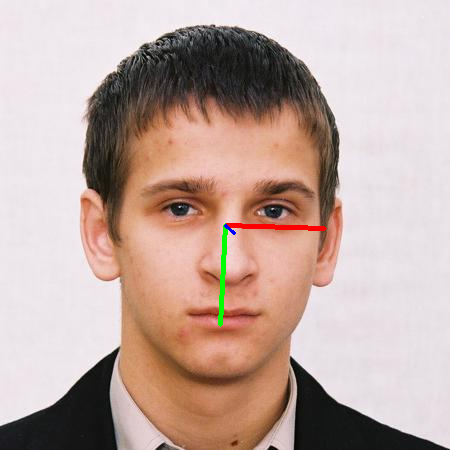

In [ ]:
image = cv2.imread('/content/AFLW2000/'+random_file+'.jpg')
# loading the mat file to extract the 3 angels of the face (pitch,yaw,roll)
mat_file = sio.loadmat('/content/AFLW2000/'+random_file+'.mat')
# extracting the labels 3 angels
pose_para = mat_file["Pose_Para"][0][:3]
pitch = pose_para[0]
yaw = pose_para[1]
roll = pose_para[2]
cv2_imshow(draw_axis(image,pitch,yaw,roll))

##get angles

In [ ]:
DDDF=pd.read_csv('/content/angle_data.csv')
DDDF['img']=DDDF['img_name']
DDDF.drop(['Unnamed: 0','img_name'],axis=1,inplace=True)

In [ ]:
DDDF

pitch        yaw       roll             img
0    -22.874239   1.044306   4.908885  image00002.jpg
1     26.932741  68.155235  17.243670  image00004.jpg
2    -10.579652  50.485413 -13.570644  image00006.jpg
3    -10.048456  17.143373 -21.392782  image00008.jpg
4    -50.544579  68.640549 -59.207973  image00010.jpg
...         ...        ...        ...             ...
1995 -11.293093  -4.035367   6.022806  image04358.jpg
1996 -13.327947 -81.288437  10.081746  image04363.jpg
1997 -82.961678  82.005554 -86.483292  image04364.jpg
1998 -24.090855 -68.249336  25.869925  image04365.jpg
1999  -0.891077 -10.320476  -1.406394  image04375.jpg

[2000 rows x 4 columns]

In [ ]:
rslt=pd.merge(df, DDDF, how="inner", on=["img"])

In [ ]:
rslt

0      1      2      3      4      5      6      7      8      9  \
0     194.0  290.0  184.0  266.0  197.0  276.0  194.0  248.0  185.0  259.0   
1     217.0  302.0  206.0  281.0  215.0  286.0  203.0  254.0  204.0  274.0   
2     221.0  308.0  237.0  286.0  229.0  291.0  236.0  255.0  241.0  278.0   
3     222.0  304.0  219.0  276.0  221.0  285.0  213.0  246.0  219.0  266.0   
4     233.0  298.0  247.0  271.0  238.0  280.0  243.0  244.0  250.0  263.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1848  226.0  306.0  229.0  283.0  227.0  287.0  223.0  251.0  230.0  274.0   
1849  229.0  324.0  220.0  298.0  227.0  302.0  213.0  260.0  219.0  289.0   
1850  224.0  303.0  230.0  272.0  227.0  282.0  225.0  239.0  232.0  262.0   
1851  229.0  314.0  203.0  296.0  220.0  295.0  190.0  270.0  197.0  290.0   
1852  220.0  300.0  228.0  286.0  224.0  289.0  224.0  254.0  230.0  278.0   

      ...    930    931    932    933    934    935             img  \
0     ...  226.0  240.0  266.0  242.0  272.0  240.0  image01822.jpg   
1     ...  229.0  230.0  275.0  216.0  279.0  211.0  image00521.jpg   
2     ...  253.0  237.0  292.0  236.0  296.0  233.0  image03738.jpg   
3     ...  235.0  227.0  280.0  218.0  284.0  215.0  image03071.jpg   
4     ...  257.0  232.0  294.0  236.0  298.0  234.0  image02219.jpg   
...   ...    ...    ...    ...    ...    ...    ...             ...   
1848  ...  243.0  227.0  289.0  218.0  293.0  215.0  image04325.jpg   
1849  ...  246.0  224.0  313.0  202.0  319.0  196.0  image03949.jpg   
1850  ...  247.0  222.0  296.0  221.0  300.0  220.0  image00060.jpg   
1851  ...  207.0  234.0  246.0  199.0  248.0  192.0  image02536.jpg   
1852  ...  244.0  233.0  290.0  226.0  293.0  224.0  image03758.jpg   

          pitch        yaw       roll  
0     -1.975403  66.214500  11.572282  
1    -19.185266  25.210886 -11.040552  
2     -6.741508 -12.655412  17.060774  
3     -0.674434   5.298100  -1.427274  
4     -0.885785 -19.488333  12.369505  
...         ...        ...        ...  
1848 -23.524061  -4.513399   8.109061  
1849 -20.885176   5.792963  -1.419527  
1850   0.536577  -6.357893   8.328095  
1851 -27.264402  38.782444 -46.335663  
1852 -14.934000  -7.751056   8.759474  

[1853 rows x 940 columns]

In [ ]:
rslt[rslt['img']=='image00053.jpg']

0         1         2         3         4         5         6  \
30  0.509099  0.681002  0.516831  0.614891  0.511513  0.633353  0.499874   

           7         8         9  ...       930       931       932       933  \
30  0.539087  0.518201  0.592554  ...  0.543531  0.489104  0.647944  0.468885   

       934       935             img     pitch       yaw      roll  
30  0.6568  0.465866  image00053.jpg -4.793926 -5.620685  2.584615  

[1 rows x 940 columns]

In [ ]:
arr=rslt.iloc[30]
arr

0                 229.0
1                 306.0
2                 232.0
3                 276.0
4                 230.0
              ...      
935               209.0
img      image00053.jpg
pitch         -4.793926
yaw           -5.620685
roll           2.584615
Name: 30, Length: 940, dtype: object

In [ ]:
def draw_axis(img, yaw, pitch, roll, tdx=None, tdy=None, size = 100):

    pitch = pitch * np.pi / 180
    yaw = -(yaw * np.pi / 180)
    roll = roll * np.pi / 180

    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

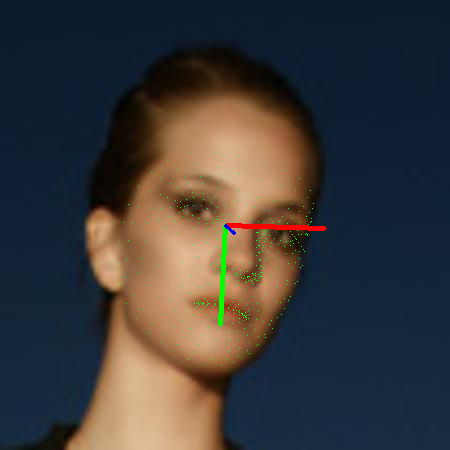

In [ ]:
image = os.path.join('/content/AFLW2000/',rslt['img'][4])
frame = cv2.imread(image)

arr=rslt.iloc[4,0:-1]
arr=np.array(arr)
i=0
for j in range(0,935,2):
    shape = frame.shape 
    # x = int(arr[j] * shape[1])
    x = int(arr[j] )

    y = int(arr[j+1] )
    # y = int(arr[j+1] * shape[0])

    # print(int(arr[90][j]),int(arr[90][j+1]))
    cv2.circle(frame,(x,y), radius=0, color=(36,255,12), thickness=1)
    # cv2.putText(frame, str(i),(int(arr[j]),int(arr[j+1])), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (36,255,12), 2)

cv2_imshow(draw_axis(frame,-5.620685,-4.793926,2.584615))
cv2.destroyAllWindows()

In [ ]:
rslt.to_csv('data_ready_without_mediapipe_norm.csv',index=False)

In [ ]:
for j in range(0,935,2):
    shape = frame.shape 
    x = int(arr[j] * shape[1])
    y = int(arr[j+1] * shape[0])
    print(x,y,end=' ')

233 298 247 271 238 280 243 244 250 263 250 253 250 228 183 210 254 207 257 197 264 162 232 302 230 305 228 307 228 308 227 312 226 317 224 321 219 329 244 276 234 274 151 172 206 223 198 222 189 220 179 212 213 223 203 199 211 202 193 197 186 199 170 216 183 336 180 207 138 206 161 208 196 256 225 295 222 304 213 296 205 298 215 303 208 303 187 309 240 270 242 261 176 187 217 239 217 264 216 260 169 249 243 252 202 183 188 183 167 160 237 200 217 207 183 300 119 283 221 270 227 274 194 303 198 303 184 177 214 268 218 188 219 182 215 152 176 169 218 167 170 183 160 178 224 300 214 300 207 301 222 272 196 303 199 304 198 302 228 268 209 303 215 304 222 305 209 327 215 318 218 314 220 309 221 307 207 304 206 305 204 307 201 309 199 287 119 241 241 277 203 303 202 304 229 278 215 274 228 276 207 242 192 244 213 263 188 153 195 164 200 176 192 315 238 190 239 173 239 156 182 216 159 220 218 222 175 200 225 235 224 262 146 223 165 228 177 233 194 236 206 235 216 233 242 228 144 241 167 197 

In [ ]:
rslt

0      1      2      3      4      5      6      7      8      9  \
0     194.0  290.0  184.0  266.0  197.0  276.0  194.0  248.0  185.0  259.0   
1     217.0  302.0  206.0  281.0  215.0  286.0  203.0  254.0  204.0  274.0   
2     221.0  308.0  237.0  286.0  229.0  291.0  236.0  255.0  241.0  278.0   
3     222.0  304.0  219.0  276.0  221.0  285.0  213.0  246.0  219.0  266.0   
4     233.0  298.0  247.0  271.0  238.0  280.0  243.0  244.0  250.0  263.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1848  226.0  306.0  229.0  283.0  227.0  287.0  223.0  251.0  230.0  274.0   
1849  229.0  324.0  220.0  298.0  227.0  302.0  213.0  260.0  219.0  289.0   
1850  224.0  303.0  230.0  272.0  227.0  282.0  225.0  239.0  232.0  262.0   
1851  229.0  314.0  203.0  296.0  220.0  295.0  190.0  270.0  197.0  290.0   
1852  220.0  300.0  228.0  286.0  224.0  289.0  224.0  254.0  230.0  278.0   

      ...    930    931    932    933    934    935             img  \
0     ...  226.0  240.0  266.0  242.0  272.0  240.0  image01822.jpg   
1     ...  229.0  230.0  275.0  216.0  279.0  211.0  image00521.jpg   
2     ...  253.0  237.0  292.0  236.0  296.0  233.0  image03738.jpg   
3     ...  235.0  227.0  280.0  218.0  284.0  215.0  image03071.jpg   
4     ...  257.0  232.0  294.0  236.0  298.0  234.0  image02219.jpg   
...   ...    ...    ...    ...    ...    ...    ...             ...   
1848  ...  243.0  227.0  289.0  218.0  293.0  215.0  image04325.jpg   
1849  ...  246.0  224.0  313.0  202.0  319.0  196.0  image03949.jpg   
1850  ...  247.0  222.0  296.0  221.0  300.0  220.0  image00060.jpg   
1851  ...  207.0  234.0  246.0  199.0  248.0  192.0  image02536.jpg   
1852  ...  244.0  233.0  290.0  226.0  293.0  224.0  image03758.jpg   

          pitch        yaw       roll  
0     -1.975403  66.214500  11.572282  
1    -19.185266  25.210886 -11.040552  
2     -6.741508 -12.655412  17.060774  
3     -0.674434   5.298100  -1.427274  
4     -0.885785 -19.488333  12.369505  
...         ...        ...        ...  
1848 -23.524061  -4.513399   8.109061  
1849 -20.885176   5.792963  -1.419527  
1850   0.536577  -6.357893   8.328095  
1851 -27.264402  38.782444 -46.335663  
1852 -14.934000  -7.751056   8.759474  

[1853 rows x 940 columns]

In [ ]:
df=rslt

In [ ]:
df[34]

0       195.0
1       223.0
2       210.0
3       224.0
4       224.0
        ...  
1848    224.0
1849    233.0
1850    220.0
1851    248.0
1852    215.0
Name: 34, Length: 1853, dtype: float32

In [ ]:
y=df[9]

In [ ]:
df.iloc[:,:-4]

0      1      2      3      4      5      6      7      8      9    \
0     194.0  290.0  184.0  266.0  197.0  276.0  194.0  248.0  185.0  259.0   
1     217.0  302.0  206.0  281.0  215.0  286.0  203.0  254.0  204.0  274.0   
2     221.0  308.0  237.0  286.0  229.0  291.0  236.0  255.0  241.0  278.0   
3     222.0  304.0  219.0  276.0  221.0  285.0  213.0  246.0  219.0  266.0   
4     233.0  298.0  247.0  271.0  238.0  280.0  243.0  244.0  250.0  263.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1848  226.0  306.0  229.0  283.0  227.0  287.0  223.0  251.0  230.0  274.0   
1849  229.0  324.0  220.0  298.0  227.0  302.0  213.0  260.0  219.0  289.0   
1850  224.0  303.0  230.0  272.0  227.0  282.0  225.0  239.0  232.0  262.0   
1851  229.0  314.0  203.0  296.0  220.0  295.0  190.0  270.0  197.0  290.0   
1852  220.0  300.0  228.0  286.0  224.0  289.0  224.0  254.0  230.0  278.0   

      ...    926    927    928    929    930    931    932    933    934  \
0     ...  237.0  238.0  231.0  239.0  226.0  240.0  266.0  242.0  272.0   
1     ...  237.0  225.0  232.0  228.0  229.0  230.0  275.0  216.0  279.0   
2     ...  258.0  233.0  254.0  235.0  253.0  237.0  292.0  236.0  296.0   
3     ...  242.0  223.0  238.0  225.0  235.0  227.0  280.0  218.0  284.0   
4     ...  262.0  231.0  258.0  232.0  257.0  232.0  294.0  236.0  298.0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1848  ...  250.0  221.0  245.0  224.0  243.0  227.0  289.0  218.0  293.0   
1849  ...  257.0  214.0  250.0  219.0  246.0  224.0  313.0  202.0  319.0   
1850  ...  254.0  220.0  249.0  221.0  247.0  222.0  296.0  221.0  300.0   
1851  ...  213.0  223.0  210.0  229.0  207.0  234.0  246.0  199.0  248.0   
1852  ...  251.0  229.0  246.0  231.0  244.0  233.0  290.0  226.0  293.0   

        935  
0     240.0  
1     211.0  
2     233.0  
3     215.0  
4     234.0  
...     ...  
1848  215.0  
1849  196.0  
1850  220.0  
1851  192.0  
1852  224.0  

[1853 rows x 936 columns]

In [ ]:
new_features = df.iloc[:,:-4] - y

In [ ]:
df.iloc[:,:-4].sub(y, axis=0)

0     1     2     3     4     5      6     7     8    9    ...   926  \
0    -65.0  31.0 -75.0   7.0 -62.0  17.0  -65.0 -11.0 -74.0  0.0  ... -22.0   
1    -57.0  28.0 -68.0   7.0 -59.0  12.0  -71.0 -20.0 -70.0  0.0  ... -37.0   
2    -57.0  30.0 -41.0   8.0 -49.0  13.0  -42.0 -23.0 -37.0  0.0  ... -20.0   
3    -44.0  38.0 -47.0  10.0 -45.0  19.0  -53.0 -20.0 -47.0  0.0  ... -24.0   
4    -30.0  35.0 -16.0   8.0 -25.0  17.0  -20.0 -19.0 -13.0  0.0  ...  -1.0   
...    ...   ...   ...   ...   ...   ...    ...   ...   ...  ...  ...   ...   
1848 -48.0  32.0 -45.0   9.0 -47.0  13.0  -51.0 -23.0 -44.0  0.0  ... -24.0   
1849 -60.0  35.0 -69.0   9.0 -62.0  13.0  -76.0 -29.0 -70.0  0.0  ... -32.0   
1850 -38.0  41.0 -32.0  10.0 -35.0  20.0  -37.0 -23.0 -30.0  0.0  ...  -8.0   
1851 -61.0  24.0 -87.0   6.0 -70.0   5.0 -100.0 -20.0 -93.0  0.0  ... -77.0   
1852 -58.0  22.0 -50.0   8.0 -54.0  11.0  -54.0 -24.0 -48.0  0.0  ... -27.0   

       927   928   929   930   931   932   933   934   935  
0    -21.0 -28.0 -20.0 -33.0 -19.0   7.0 -17.0  13.0 -19.0  
1    -49.0 -42.0 -46.0 -45.0 -44.0   1.0 -58.0   5.0 -63.0  
2    -45.0 -24.0 -43.0 -25.0 -41.0  14.0 -42.0  18.0 -45.0  
3    -43.0 -28.0 -41.0 -31.0 -39.0  14.0 -48.0  18.0 -51.0  
4    -32.0  -5.0 -31.0  -6.0 -31.0  31.0 -27.0  35.0 -29.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
1848 -53.0 -29.0 -50.0 -31.0 -47.0  15.0 -56.0  19.0 -59.0  
1849 -75.0 -39.0 -70.0 -43.0 -65.0  24.0 -87.0  30.0 -93.0  
1850 -42.0 -13.0 -41.0 -15.0 -40.0  34.0 -41.0  38.0 -42.0  
1851 -67.0 -80.0 -61.0 -83.0 -56.0 -44.0 -91.0 -42.0 -98.0  
1852 -49.0 -32.0 -47.0 -34.0 -45.0  12.0 -52.0  15.0 -54.0  

[1853 rows x 936 columns]

In [ ]:
data

0      1      2      3      4      5      6      7      8      9    \
0     194.0  290.0  184.0  266.0  197.0  276.0  194.0  248.0  185.0  259.0   
1     217.0  302.0  206.0  281.0  215.0  286.0  203.0  254.0  204.0  274.0   
2     221.0  308.0  237.0  286.0  229.0  291.0  236.0  255.0  241.0  278.0   
3     222.0  304.0  219.0  276.0  221.0  285.0  213.0  246.0  219.0  266.0   
4     233.0  298.0  247.0  271.0  238.0  280.0  243.0  244.0  250.0  263.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1848  226.0  306.0  229.0  283.0  227.0  287.0  223.0  251.0  230.0  274.0   
1849  229.0  324.0  220.0  298.0  227.0  302.0  213.0  260.0  219.0  289.0   
1850  224.0  303.0  230.0  272.0  227.0  282.0  225.0  239.0  232.0  262.0   
1851  229.0  314.0  203.0  296.0  220.0  295.0  190.0  270.0  197.0  290.0   
1852  220.0  300.0  228.0  286.0  224.0  289.0  224.0  254.0  230.0  278.0   

      ...    926    927    928    929    930    931    932    933    934  \
0     ...  237.0  238.0  231.0  239.0  226.0  240.0  266.0  242.0  272.0   
1     ...  237.0  225.0  232.0  228.0  229.0  230.0  275.0  216.0  279.0   
2     ...  258.0  233.0  254.0  235.0  253.0  237.0  292.0  236.0  296.0   
3     ...  242.0  223.0  238.0  225.0  235.0  227.0  280.0  218.0  284.0   
4     ...  262.0  231.0  258.0  232.0  257.0  232.0  294.0  236.0  298.0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1848  ...  250.0  221.0  245.0  224.0  243.0  227.0  289.0  218.0  293.0   
1849  ...  257.0  214.0  250.0  219.0  246.0  224.0  313.0  202.0  319.0   
1850  ...  254.0  220.0  249.0  221.0  247.0  222.0  296.0  221.0  300.0   
1851  ...  213.0  223.0  210.0  229.0  207.0  234.0  246.0  199.0  248.0   
1852  ...  251.0  229.0  246.0  231.0  244.0  233.0  290.0  226.0  293.0   

        935  
0     240.0  
1     211.0  
2     233.0  
3     215.0  
4     234.0  
...     ...  
1848  215.0  
1849  196.0  
1850  220.0  
1851  192.0  
1852  224.0  

[1853 rows x 936 columns]

In [ ]:
data=rslt.iloc[:,:-4]
case3=data.iloc[:,::2]    #odd cols
case4=data.iloc[:,1::2]   #even cols
case3=case3.sub(data[8], axis=0)
case4=case4.sub(data[9], axis=0)

In [ ]:
data=rslt.iloc[:,:-4]
case3=data.iloc[:,::2]    #odd cols
case4=data.iloc[:,1::2]   #even cols
data.iloc[:,::2] =data.iloc[:,::2] .sub(data[8], axis=0)
case4=case4.sub(data[9], axis=0)

0    2     4    6    8    10    12    14    16    18   ...   916   918  \
0      9.0 -1.0  12.0  9.0  0.0  5.0  24.0  16.0  30.0  30.0  ...  11.0  13.0   
1     13.0  2.0  11.0 -1.0  0.0  1.0   7.0 -24.0   7.0   5.0  ...  13.0  16.0   
2    -20.0 -4.0 -12.0 -5.0  0.0  2.0   5.0 -59.0  10.0  14.0  ...   0.0   5.0   
3      3.0  0.0   2.0 -6.0  0.0  0.0   1.0 -50.0   2.0   2.0  ...   8.0  12.0   
4    -17.0 -3.0 -12.0 -7.0  0.0  0.0   0.0 -67.0   4.0   7.0  ...  -1.0   3.0   
...    ...  ...   ...  ...  ...  ...   ...   ...   ...   ...  ...   ...   ...   
1848  -4.0 -1.0  -3.0 -7.0  0.0  0.0   1.0 -59.0   2.0   3.0  ...   7.0  12.0   
1849  10.0  1.0   8.0 -6.0  0.0  0.0   4.0 -58.0   3.0   2.0  ...  15.0  20.0   
1850  -8.0 -2.0  -5.0 -7.0  0.0  1.0   3.0 -65.0   5.0   7.0  ...   5.0  10.0   
1851  32.0  6.0  23.0 -7.0  0.0 -3.0  -7.0 -28.0 -17.0 -25.0  ...  20.0  21.0   
1852 -10.0 -2.0  -6.0 -6.0  0.0  1.0   3.0 -59.0   5.0   6.0  ...   5.0  10.0   

       920   922   924   926   928   930   932    934  
0     29.0   8.0  12.0  52.0  46.0  41.0  81.0   87.0  
1     30.0  11.0  13.0  33.0  28.0  25.0  71.0   75.0  
2      6.0  -1.0  -4.0  17.0  13.0  12.0  51.0   55.0  
3     21.0   7.0   7.0  23.0  19.0  16.0  61.0   65.0  
4      2.0  -2.0  -5.0  12.0   8.0   7.0  44.0   48.0  
...    ...   ...   ...   ...   ...   ...   ...    ...  
1848  19.0   6.0   4.0  20.0  15.0  13.0  59.0   63.0  
1849  36.0  13.0  14.0  38.0  31.0  27.0  94.0  100.0  
1850  16.0   4.0   2.0  22.0  17.0  15.0  64.0   68.0  
1851  40.0  18.0  22.0  16.0  13.0  10.0  49.0   51.0  
1852  17.0   4.0   2.0  21.0  16.0  14.0  60.0   63.0  

[1853 rows x 468 columns]

In [ ]:
case4

1     3     5     7    9     11    13    15    17     19   ...   917  \
0     31.0   7.0  17.0 -11.0  0.0  -7.0 -23.0 -25.0 -36.0  -43.0  ...  12.0   
1     28.0   7.0  12.0 -20.0  0.0 -11.0 -41.0 -49.0 -64.0  -75.0  ...   9.0   
2     30.0   8.0  13.0 -23.0  0.0 -12.0 -43.0 -67.0 -66.0  -77.0  ...  11.0   
3     38.0  10.0  19.0 -20.0  0.0 -12.0 -41.0 -43.0 -64.0  -76.0  ...  12.0   
4     35.0   8.0  17.0 -19.0  0.0 -10.0 -35.0 -53.0 -56.0  -66.0  ...  13.0   
...    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...  ...   ...   
1848  32.0   9.0  13.0 -23.0  0.0 -12.0 -46.0 -60.0 -65.0  -76.0  ...   9.0   
1849  35.0   9.0  13.0 -29.0  0.0 -15.0 -59.0 -73.0 -91.0 -105.0  ...   8.0   
1850  41.0  10.0  20.0 -23.0  0.0 -13.0 -44.0 -55.0 -65.0  -77.0  ...  14.0   
1851  24.0   6.0   5.0 -20.0  0.0 -11.0 -44.0 -44.0 -65.0  -73.0  ...   2.0   
1852  22.0   8.0  11.0 -24.0  0.0 -13.0 -44.0 -61.0 -66.0  -77.0  ...   9.0   

       919   921   923   925   927   929   931   933   935  
0     10.0  19.0  12.0  14.0 -21.0 -20.0 -19.0 -17.0 -19.0  
1      6.0   8.0  10.0  10.0 -49.0 -46.0 -44.0 -58.0 -63.0  
2      9.0  12.0  12.0  12.0 -45.0 -43.0 -41.0 -42.0 -45.0  
3     10.0  15.0  13.0  15.0 -43.0 -41.0 -39.0 -48.0 -51.0  
4     11.0  19.0  13.0  15.0 -32.0 -31.0 -31.0 -27.0 -29.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
1848   6.0   7.0  10.0  11.0 -53.0 -50.0 -47.0 -56.0 -59.0  
1849   5.0   4.0  10.0  10.0 -75.0 -70.0 -65.0 -87.0 -93.0  
1850  11.0  18.0  15.0  16.0 -42.0 -41.0 -40.0 -41.0 -42.0  
1851  -2.0  -7.0   4.0   3.0 -67.0 -61.0 -56.0 -91.0 -98.0  
1852   7.0   6.0  10.0  10.0 -49.0 -47.0 -45.0 -52.0 -54.0  

[1853 rows x 468 columns]